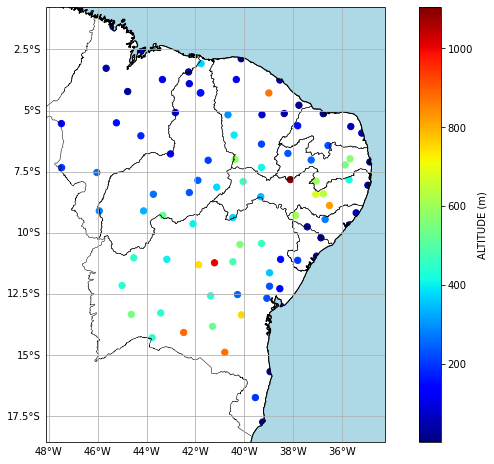

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

#main_var = 'ELEVAÇÃO'

#shapefile e dados
file_in = 'maps/nordeste/Info_Cord.xlsx'
feat_file = 'maps/nordeste/Shapes_Nordeste/Nordeste_SIRGAS2000_IBGE_2017.shp'
#file_out = 'images/map_%s.png' %main_var

#Ler dados
df = pd.read_excel(file_in)

#preparando a figura
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
gd = ax.gridlines(draw_labels=True)
gd.right_labels = False
gd.top_labels = False
lon_formatter = LongitudeFormatter(number_format='.1f', degree_symbol='',\
 dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN.with_scale('10m'), zorder=2, edgecolor='black', facecolor='lightblue')

#Ler o shapefile
shape_feature = ShapelyFeature(shpreader.Reader(feat_file).geometries(),\
 ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.5)
ax.add_feature(shape_feature)

# Informação do DataFrame
normalize = colors.Normalize(vmin=min(df['ELEVAÇÃO']), vmax=max(df['ELEVAÇÃO']))
cs = ax.scatter(df['LONGITUDE'].values, df['LATITUDE'].values,\
 c=df['ELEVAÇÃO'].values, cmap=plt.get_cmap('jet'),\
 transform=ccrs.PlateCarree(), marker='o', s=40)

# Barra de cores
cax, _ = colorbar.make_axes(ax)
cbar = colorbar.ColorbarBase(cax, cmap=plt.get_cmap('jet'),\
 norm=normalize)
cbar.set_label('ALTITUDE (m)')

#plt.savefig('Mapa de elevação', dpi=300, bbox_inches= 'tight')
plt.show()